<a href="https://colab.research.google.com/github/qndbsxo/Data-Analysis/blob/main/Projects/4.%EB%B2%94%EC%A3%84%ED%98%84%ED%99%A9/4_a_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%B2%94%EC%A3%84%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON PROGRAMMING


### 레퍼런스 : 파이썬으로 데이터 주무르기

## 서울시 구별 범죄 발생과 검거율 데이터 분석
### '서울시 관서별 5대 범죄 발생 검거 현황' 파일을 가지고 분석합니다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


import requests
import json

%matplotlib inline

## 실습 1. crime_in_Seoul.csv 파일을 pandas 로 읽어오세요.
### 한글이 깨지지 않도록  encoding='euc-kr' 옵션을 넣습니다.

In [2]:
df_crime = pd.read_csv('/content/crime_in_Seoul.csv', encoding='cp949')

## 실습 2. 경찰서들은 하나의 구에 여러개가 있을 수 있습니다. 따라서 우리는 구 단위로 데이터를 통합하겠습니다.

### 실습 2-1. 구글 맵 API 를 이용해서, 경찰서가 무슨 구에 있는지 확인하기 위해
### 아나콘다 프롬프트웨어 다음을 실행.  pip install googlemaps

In [3]:
!pip install googlemaps

### 실습 2-2. 구글 클라우드의 MAPS API 페이지로 이동하여, API 키를 생성합니다.
### https://cloud.google.com/maps-platform/?hl=ko
### 콘솔로 이동 => Geocoding API 선택 => 사용자인증정보 에서 API 키 생성

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.21.24.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.21.24.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.20.46.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.20.46.png)

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.20.11.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2017.20.11.png)

* 구글 맵스를 사용해서 경찰서의 위치(위도, 경도) 정보를 받아온다

In [4]:

class KakaoLocalAPI:
    """
    Kakao Local API 컨트롤러
    """

    def __init__(self, rest_api_key):
        """
        Rest API키 초기화 및 기능 별 URL 설정
        """

        # REST API 키 설정
        self.rest_api_key = rest_api_key
        self.headers = {"Authorization": "KakaoAK {}".format(rest_api_key)}

        # 서비스 별 URL 설정

        # 01 주소 검색
        self.URL_01 = "https://dapi.kakao.com/v2/local/search/address.json"
        # 02 좌표-행정구역정보 변환
        self.URL_02 = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"
        # 03 좌표-주소 변환
        self.URL_03 = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
        # 04 좌표계 변환
        self.URL_04 = "https://dapi.kakao.com/v2/local/geo/transcoord.json"
        # 05 키워드 검색
        self.URL_05 = "https://dapi.kakao.com/v2/local/search/keyword.json"
        # 06 카테고리 검색
        self.URL_06 = "https://dapi.kakao.com/v2/local/search/category.json"
    
    def search_address(self, query, analyze_type=None, page=None, size=None):
        """
        01 주소 검색
        """
        params = {"query": f"{query}"}

        if analyze_type != None:
            params["analyze_type"] = f"{analyze_type}"

        if page != None:
            params['page'] = f"{page}"

        if size != None:
            params['size'] = f"{size}"

        res = requests.get(self.URL_01, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document
        
    def search_keyword(self,query,category_group_code=None,x=None,y=None,radius=None,rect=None,page=None,size=None,sort=None):
        """
        05 키워드 검색
        """
        params = {"query": f"{query}"}
        
        if category_group_code != None:
            params['category_group_code'] = f"{category_group_code}"
        if x != None:
            params['x'] = f"{x}"
        if y != None:
            params['y'] = f"{y}"
        if radius != None:
            params['radius'] = f"{radius}"
        if rect != None:
            params['rect'] = f"{rect}"
        if page != None:
            params['page'] = f"{page}"
        if size != None:
            params['size'] = f"{params}"
        if sort != None:
            params['sort'] = f"{sort}"
        
        res = requests.get(self.URL_05, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document

rest_api_key = 'ba9d01c0398649ca69027668574d8cdf'
    

In [5]:
df_crime['경찰서'] = df_crime['관서명'].str[:-1]
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,경찰서
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중부
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,남대문
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,혜화
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포


In [6]:

kakaomap  = KakaoLocalAPI(rest_api_key)
addr = [] 
for i in range(len(df_crime)): 
    try:
        temp_police = df_crime.loc[i, '경찰서']
        temp_addr =  kakaomap.search_keyword('서울 ' + temp_police +   '경찰서')['documents'][0]['address_name'].split(' ')[1]
        addr.append(temp_addr)
        print(i, addr[-1])
    except Exception as e:
        lat.append(None)
        long.append(None)    
        print(i, e)

0 중구
1 종로구
2 중구
3 서대문구
4 종로구
5 용산구
6 성북구
7 동대문구
8 마포구
9 영등포구
10 성동구
11 동작구
12 광진구
13 은평구
14 강북구
15 금천구
16 중랑구
17 강남구
18 관악구
19 강서구
20 강동구
21 성북구
22 구로구
23 서초구
24 양천구
25 송파구
26 노원구
27 서초구
28 은평구
29 도봉구
30 강남구


## 실습 3. station_addreess 에 저장된 주소에서, 구만 따로 띄어냅니다. (예, 종로구)
## 따로 띄어낸 구를, crime_anal_police 에 '구별' 컬럼을 만들어서 넣습니다.


In [7]:
df_crime['구별'] = pd.Series(data=addr)
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,경찰서,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중부,중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로,종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,남대문,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문,서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,혜화,종로구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산,용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북,성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문,동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포,마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포,영등포구


## .실습 3. crime_anal_police 데이터프레임을, csv 파일로 저장합니다.
### 저장할 파일명은 new_crime_in_Seoul.csv 로 저장하세요.
### 저장하는 함수는, 데이터프레임의 to_csv 입니다. 

In [8]:
df_crime.to_csv('new_crime_in_Seoul.csv')

## pandas의 pivot_table 익히기

In [9]:
import pandas as pd
import numpy as np

In [10]:
# 피봇팅 한다. 즉 컬럼의 값을 열로 만드는것.

# 범죄 데이터 구별로 정리하기

In [11]:
# ',' 제거 후 , int 형변환
# why? object는 pivot테이블의 value로 로드되지 않기 때문에
df_crime['절도 발생'] = df_crime['절도 발생'].str.replace(',','').astype(int) 
df_crime['절도 검거'] = df_crime['절도 검거'].str.replace(',','').astype(int)
df_crime['폭력 발생'] = df_crime['폭력 발생'].str.replace(',','').astype(int)
df_crime['폭력 검거'] = df_crime['폭력 검거'].str.replace(',','').astype(int)



## 실습 4. 인덱스를 '구별' 로 피봇팅 한다.

In [12]:
pivot_crime  = pd.pivot_table(data=df_crime, index='구별', ) # index를 구별로 pivoting

In [13]:
pivot_crime

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,174.5,224.5,9.0,10.5,5.0,6.5,825.0,1925.0,1852.5,2142.0
강동구,123.0,156.0,8.0,6.0,3.0,4.0,789.0,2366.0,2248.0,2712.0
강북구,126.0,153.0,13.0,14.0,8.0,7.0,618.0,1434.0,2348.0,2649.0
강서구,191.0,262.0,13.0,13.0,8.0,7.0,1260.0,2096.0,2718.0,3207.0
관악구,221.0,320.0,14.0,12.0,8.0,9.0,827.0,2706.0,2642.0,3298.0
광진구,220.0,240.0,26.0,14.0,4.0,4.0,1277.0,3026.0,2180.0,2625.0
구로구,164.0,281.0,11.0,15.0,6.0,8.0,889.0,2335.0,2432.0,3007.0
금천구,122.0,151.0,6.0,6.0,4.0,3.0,888.0,1567.0,1776.0,2054.0
노원구,121.0,197.0,7.0,7.0,10.0,10.0,801.0,2193.0,2329.0,2723.0


## 실습 5. '강간검거율' , '강도검거율', '살인검거율', '절도검거율', '폭력검거율' 을 계산하여, crime_anal에 각 컬럼을 추가한다. ( 검거율은 * 100 까지 한 값)

In [14]:
pivot_crime['강간검거율'] = pivot_crime['강간 검거'] / pivot_crime['강간 발생'] * 100  # 강간검거율
pivot_crime['강도검거율'] = pivot_crime['강도 검거'] / pivot_crime['강도 발생'] * 100 # 강도검거율
pivot_crime['살인검거율'] = pivot_crime['살인 검거'] / pivot_crime['살인 발생'] * 100 # 살인검거율
pivot_crime['절도검거율'] = pivot_crime['절도 검거'] / pivot_crime['절도 발생'] * 100 # 절도검거율
pivot_crime['폭력검거율'] = pivot_crime['폭력 검거'] / pivot_crime['강도 발생'] * 100 # 폭력검거율

In [15]:
pivot_crime

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,174.5,224.5,9.0,10.5,5.0,6.5,825.0,1925.0,1852.5,2142.0,77.728285,85.714286,76.923077,42.857143,17642.857143
강동구,123.0,156.0,8.0,6.0,3.0,4.0,789.0,2366.0,2248.0,2712.0,78.846154,133.333333,75.000000,33.347422,37466.666667
강북구,126.0,153.0,13.0,14.0,8.0,7.0,618.0,1434.0,2348.0,2649.0,82.352941,92.857143,114.285714,43.096234,16771.428571
강서구,191.0,262.0,13.0,13.0,8.0,7.0,1260.0,2096.0,2718.0,3207.0,72.900763,100.000000,114.285714,60.114504,20907.692308
관악구,221.0,320.0,14.0,12.0,8.0,9.0,827.0,2706.0,2642.0,3298.0,69.062500,116.666667,88.888889,30.561715,22016.666667
광진구,220.0,240.0,26.0,14.0,4.0,4.0,1277.0,3026.0,2180.0,2625.0,91.666667,185.714286,100.000000,42.200925,15571.428571
구로구,164.0,281.0,11.0,15.0,6.0,8.0,889.0,2335.0,2432.0,3007.0,58.362989,73.333333,75.000000,38.072805,16213.333333
금천구,122.0,151.0,6.0,6.0,4.0,3.0,888.0,1567.0,1776.0,2054.0,80.794702,100.000000,133.333333,56.668794,29600.000000
노원구,121.0,197.0,7.0,7.0,10.0,10.0,801.0,2193.0,2329.0,2723.0,61.421320,100.000000,100.000000,36.525308,33271.428571


## 실습 6. 이제 필요없는, '강간 검거' , '강도 검거', '살인 검거', '절도 검거', '폭력 검거' 컬럼을 제거한다.

In [16]:
pivot_crime = pivot_crime.drop(columns=['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거']) # 컬럼 제거

In [17]:
pivot_crime

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,224.5,10.5,6.5,1925.0,2142.0,77.728285,85.714286,76.923077,42.857143,17642.857143
강동구,156.0,6.0,4.0,2366.0,2712.0,78.846154,133.333333,75.000000,33.347422,37466.666667
강북구,153.0,14.0,7.0,1434.0,2649.0,82.352941,92.857143,114.285714,43.096234,16771.428571
강서구,262.0,13.0,7.0,2096.0,3207.0,72.900763,100.000000,114.285714,60.114504,20907.692308
관악구,320.0,12.0,9.0,2706.0,3298.0,69.062500,116.666667,88.888889,30.561715,22016.666667
광진구,240.0,14.0,4.0,3026.0,2625.0,91.666667,185.714286,100.000000,42.200925,15571.428571
구로구,281.0,15.0,8.0,2335.0,3007.0,58.362989,73.333333,75.000000,38.072805,16213.333333
금천구,151.0,6.0,3.0,1567.0,2054.0,80.794702,100.000000,133.333333,56.668794,29600.000000
노원구,197.0,7.0,10.0,2193.0,2723.0,61.421320,100.000000,100.000000,36.525308,33271.428571


## 실습 7. describe() 함수로 값을 확인해 보니, 검거율이 100 이상인 경우도 있다. 따라서 100보다 크면, 100으로 값을 셋팅하세요.

In [18]:
pivot_crime.describe()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,187.180000,9.760000,5.760000,1913.960000,2287.000000,77.621027,90.242868,97.532579,39.467270,22184.111222
std,73.866135,4.637079,3.509273,657.940963,769.012516,12.559091,27.590932,20.491159,6.849347,7705.671780
min,75.000000,2.500000,1.500000,892.500000,1104.500000,48.771930,50.000000,66.666667,30.561715,12171.428571
25%,126.000000,6.000000,3.000000,1434.000000,1612.000000,69.062500,73.333333,85.714286,35.442359,16771.428571
50%,187.000000,9.000000,5.000000,1890.000000,2509.000000,80.519481,85.714286,100.000000,38.072805,20907.692308
75%,240.000000,13.000000,8.000000,2335.000000,2847.000000,84.393064,100.000000,100.000000,41.512605,25622.222222
max,320.000000,22.000000,14.000000,3239.000000,3572.000000,103.921569,185.714286,166.666667,60.114504,37466.666667


In [19]:
pivot_crime.loc[pivot_crime['강간검거율'] > 100, '강간검거율'] = 100
pivot_crime.loc[pivot_crime['강도검거율'] > 100, '강도검거율'] = 100
pivot_crime.loc[pivot_crime['살인검거율'] > 100, '살인검거율'] = 100
pivot_crime.loc[pivot_crime['절도검거율'] > 100, '절도검거율'] = 100
pivot_crime.loc[pivot_crime['폭력검거율'] > 100, '폭력검거율'] = 100

In [20]:
pivot_crime

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,224.5,10.5,6.5,1925.0,2142.0,77.728285,85.714286,76.923077,42.857143,100.0
강동구,156.0,6.0,4.0,2366.0,2712.0,78.846154,100.000000,75.000000,33.347422,100.0
강북구,153.0,14.0,7.0,1434.0,2649.0,82.352941,92.857143,100.000000,43.096234,100.0
강서구,262.0,13.0,7.0,2096.0,3207.0,72.900763,100.000000,100.000000,60.114504,100.0
관악구,320.0,12.0,9.0,2706.0,3298.0,69.062500,100.000000,88.888889,30.561715,100.0
광진구,240.0,14.0,4.0,3026.0,2625.0,91.666667,100.000000,100.000000,42.200925,100.0
구로구,281.0,15.0,8.0,2335.0,3007.0,58.362989,73.333333,75.000000,38.072805,100.0
금천구,151.0,6.0,3.0,1567.0,2054.0,80.794702,100.000000,100.000000,56.668794,100.0
노원구,197.0,7.0,10.0,2193.0,2723.0,61.421320,100.000000,100.000000,36.525308,100.0


## 실습 8. 강간 발생, 강도 발생, 살인 발생, 절도 발생, 폭력 발생 의 컬럼 명을, 강간, 강도, 살인, 절도, 폭력으로 rename 하세요.

In [21]:
pivot_crime = pivot_crime.rename(columns={'강간 발생':'강간', '강도 발생':'강도', '살인 발생':'살인', '절도 발생':'절도', '폭력 발생':'폭력'})

In [22]:
pivot_crime

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,224.5,10.5,6.5,1925.0,2142.0,77.728285,85.714286,76.923077,42.857143,100.0
강동구,156.0,6.0,4.0,2366.0,2712.0,78.846154,100.000000,75.000000,33.347422,100.0
강북구,153.0,14.0,7.0,1434.0,2649.0,82.352941,92.857143,100.000000,43.096234,100.0
강서구,262.0,13.0,7.0,2096.0,3207.0,72.900763,100.000000,100.000000,60.114504,100.0
관악구,320.0,12.0,9.0,2706.0,3298.0,69.062500,100.000000,88.888889,30.561715,100.0
광진구,240.0,14.0,4.0,3026.0,2625.0,91.666667,100.000000,100.000000,42.200925,100.0
구로구,281.0,15.0,8.0,2335.0,3007.0,58.362989,73.333333,75.000000,38.072805,100.0
금천구,151.0,6.0,3.0,1567.0,2054.0,80.794702,100.000000,100.000000,56.668794,100.0
노원구,197.0,7.0,10.0,2193.0,2723.0,61.421320,100.000000,100.000000,36.525308,100.0


## .실습 9. 강간, 강도, 살인, 절도, 폭력 을 노멀라이징 합니다. 
### 데이터 노멀라이징 하는 이유는, 각각의 레인지를 통일하여, 해석하기 쉽게 하기 위함입니다. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X = pivot_crime[['강도','강간', '살인', '절도', '폭력']]

In [26]:
scaled_x = scaler.fit_transform(X.values.astype(float))

In [27]:
scaled_df= pd.DataFrame(scaled_x, columns=['강도', '강간', '살인', '절도', '폭력'])

## 실습 10. 강간, 강도, 살인, 절도, 폭력 의 값을 모두 더하고, 이 더한값을 '범죄' 라는 컬럼을 만들어서 넣습니다.
### 아래 예처럼.

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2018.30.50.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202019-08-17%2018.30.50.png)

In [28]:
scaled_df['범죄'] = scaled_df['강도'] + scaled_df['강간'] + scaled_df['살인'] + scaled_df['절도'] + scaled_df['폭력']

In [29]:
scaled_df

,강도,강간,살인,절도,폭력,범죄
0,0.410256,0.610204,0.40,0.440017,0.420466,2.280944
1,0.179487,0.330612,0.20,0.627957,0.651469,1.989525
2,0.589744,0.318367,0.44,0.230769,0.625937,2.204817
3,0.538462,0.763265,0.44,0.512892,0.852077,3.106695
4,0.487179,1.000000,0.60,0.772853,0.888956,3.748989
5,0.589744,0.673469,0.20,0.909227,0.616211,2.988650
6,0.641026,0.840816,0.52,0.614745,0.771023,3.387611
7,0.179487,0.310204,0.12,0.287449,0.384802,1.281943
8,0.230769,0.497959,0.68,0.554230,0.655927,2.618885
9,0.333333,0.110204,0.12,0.072661,0.155015,0.791214


## 실습 11. '강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율' 의 값을 모두 더하고, 이 더한값을 '검거' 라는 컬럼을 만들어서 넣습니다.

In [30]:
pivot_crime['검거']= pivot_crime['강간검거율'] + pivot_crime['강도검거율'] + pivot_crime['살인검거율'] + pivot_crime['절도검거율'] + pivot_crime['폭력검거율']

In [31]:
pivot_crime

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거
구별,,,,,,,,,,,
강남구,224.5,10.5,6.5,1925.0,2142.0,77.728285,85.714286,76.923077,42.857143,100.0,383.222791
강동구,156.0,6.0,4.0,2366.0,2712.0,78.846154,100.000000,75.000000,33.347422,100.0,387.193576
강북구,153.0,14.0,7.0,1434.0,2649.0,82.352941,92.857143,100.000000,43.096234,100.0,418.306318
강서구,262.0,13.0,7.0,2096.0,3207.0,72.900763,100.000000,100.000000,60.114504,100.0,433.015267
관악구,320.0,12.0,9.0,2706.0,3298.0,69.062500,100.000000,88.888889,30.561715,100.0,388.513104
광진구,240.0,14.0,4.0,3026.0,2625.0,91.666667,100.000000,100.000000,42.200925,100.0,433.867592
구로구,281.0,15.0,8.0,2335.0,3007.0,58.362989,73.333333,75.000000,38.072805,100.0,344.769128
금천구,151.0,6.0,3.0,1567.0,2054.0,80.794702,100.000000,100.000000,56.668794,100.0,437.463496
노원구,197.0,7.0,10.0,2193.0,2723.0,61.421320,100.000000,100.000000,36.525308,100.0,397.946628


# Visualization using seaborn

In [32]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 실습 12. sb의 pairplot 으로 "강도", "살인", "폭력" 을 나타내세요. (연관성 확인)

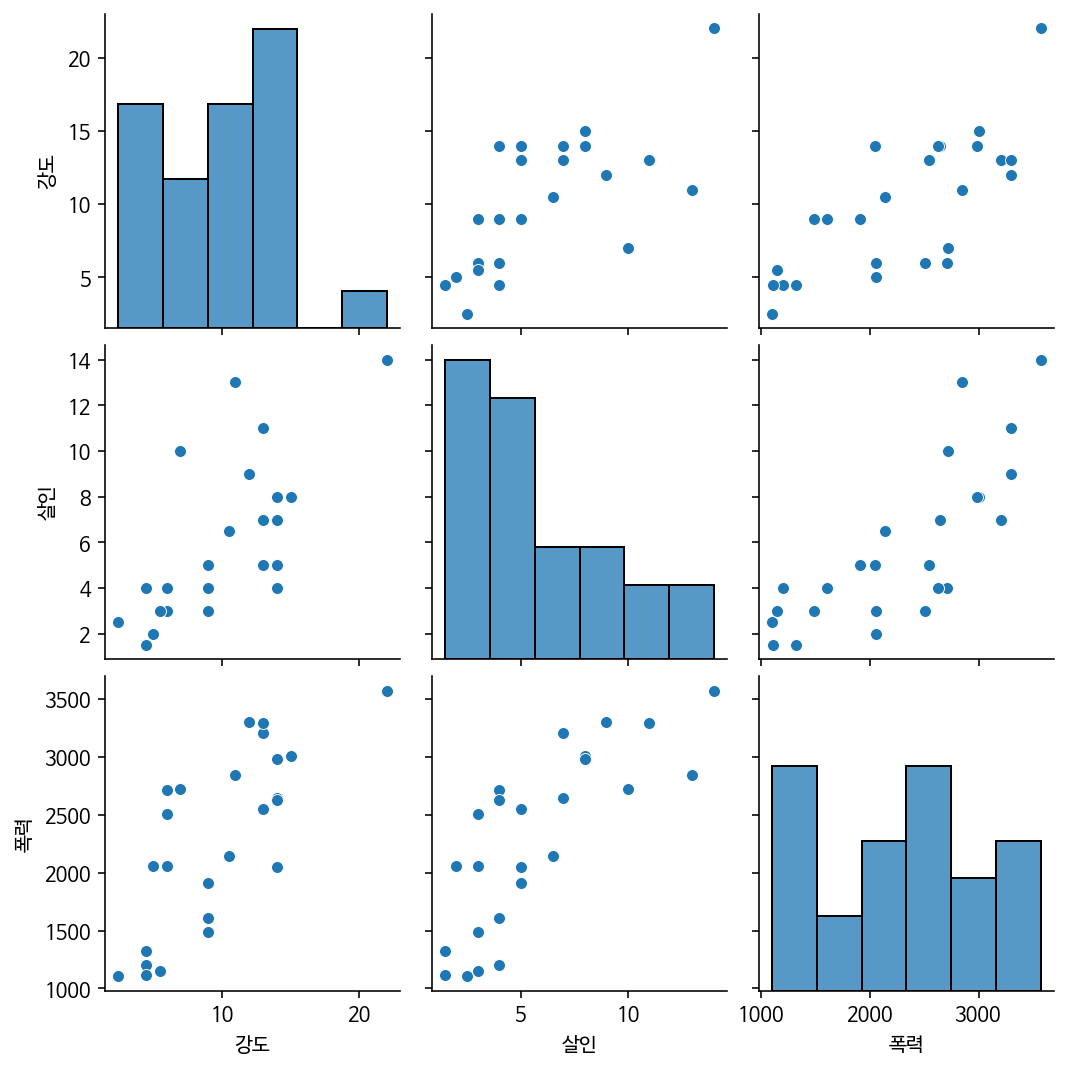

In [34]:
sns.pairplot(data=pivot_crime[['강도', '살인', '폭력']])

## 실습 13. x_vars는 "인구수", "CCTV" 를, y_vars는 "살인", "강도"로 pariplot을 나타내고, 연관성을 확인하세요.

In [ ]:
cctv_seoul= pd.read_csv('/content/CCTV_in_Seoul.csv') # load csv
pop_seoul = pd.read_excel('/content/population_in_Seoul.xls', header=2) #load csv
pop_seoul = pop_seoul.drop(index=0) # Drop index
pop_seoul = pop_seoul[['계', '자치구']] #Select
pop_seoul = pop_seoul.rename(columns={'계':'인구수', '자치구':'구별'}) # Rename
cctv_seoul = cctv_seoul[['기관명', '소계']] # Select
cctv_seoul = cctv_seoul.rename(columns={"기관명":'구별', '소계':'CCTV'}) # Rename
pop_cctv_seoul= pd.merge(left=pop_seoul, right=cctv_seoul, on='구별')  # Merge
pop_cctv_seoul

In [68]:
pivot_merge = pd.merge(left=pivot_crime, right=pop_cctv_seoul, on='구별') # Merge
pivot_merge = pivot_merge.set_index(keys='구별') # Set index


## 실습 14. x_vars는 "인구수", "CCTV" 를, y_vars는 "살인검거율", "폭력검거율"로 pariplot을 나타내고, 연관성을 확인하세요.

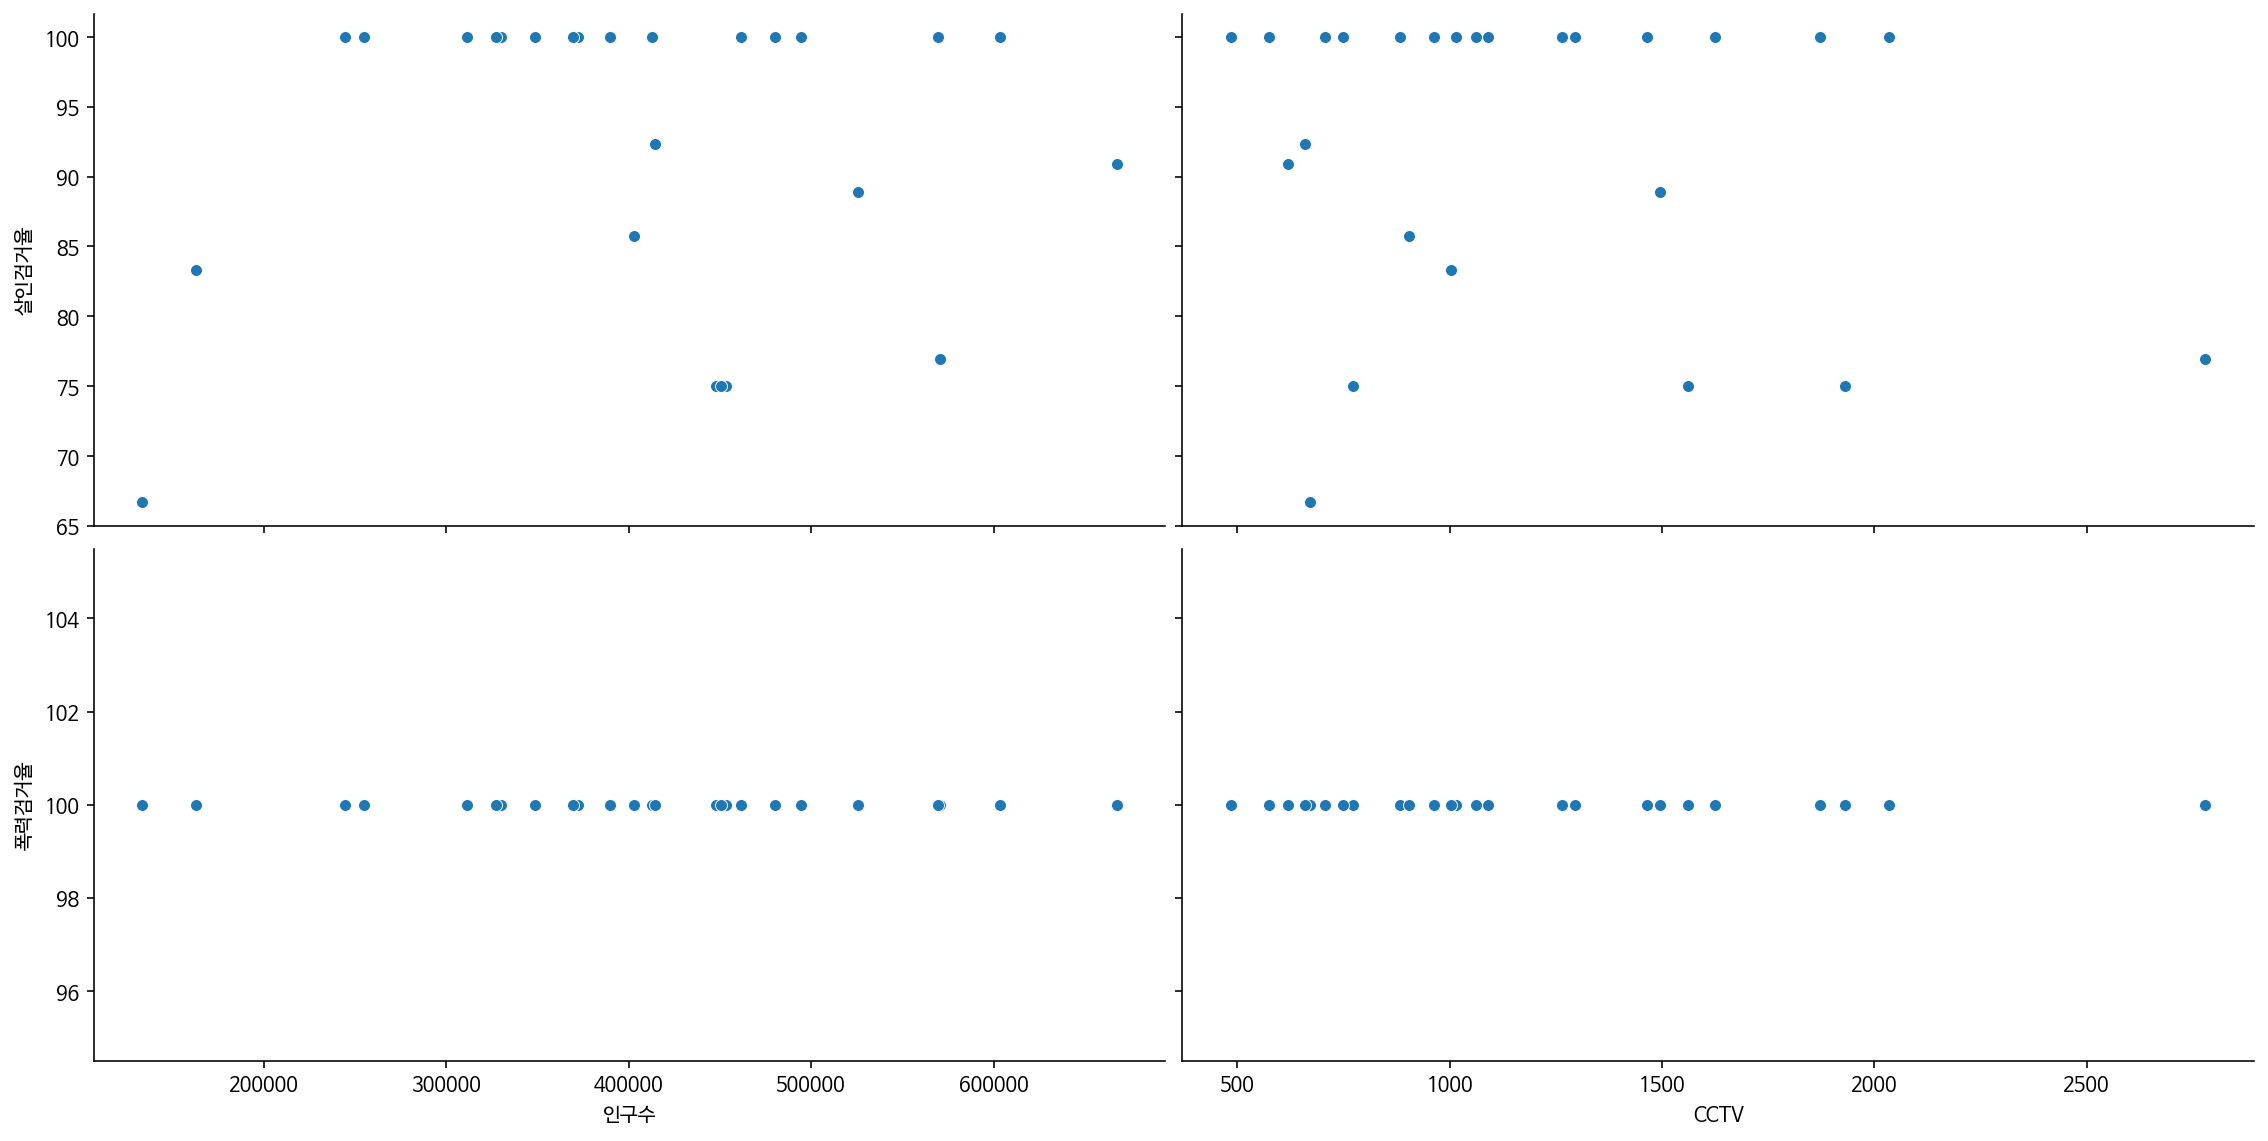

In [78]:

sns.pairplot(data=pivot_merge, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '폭력검거율'], height=4, aspect=2)

## 실습 15. x_vars는 "인구수", "CCTV" 를, y_vars는 "절도검거율", "강도검거율"로 pariplot을 나타내고, 연관성을 확인하세요.

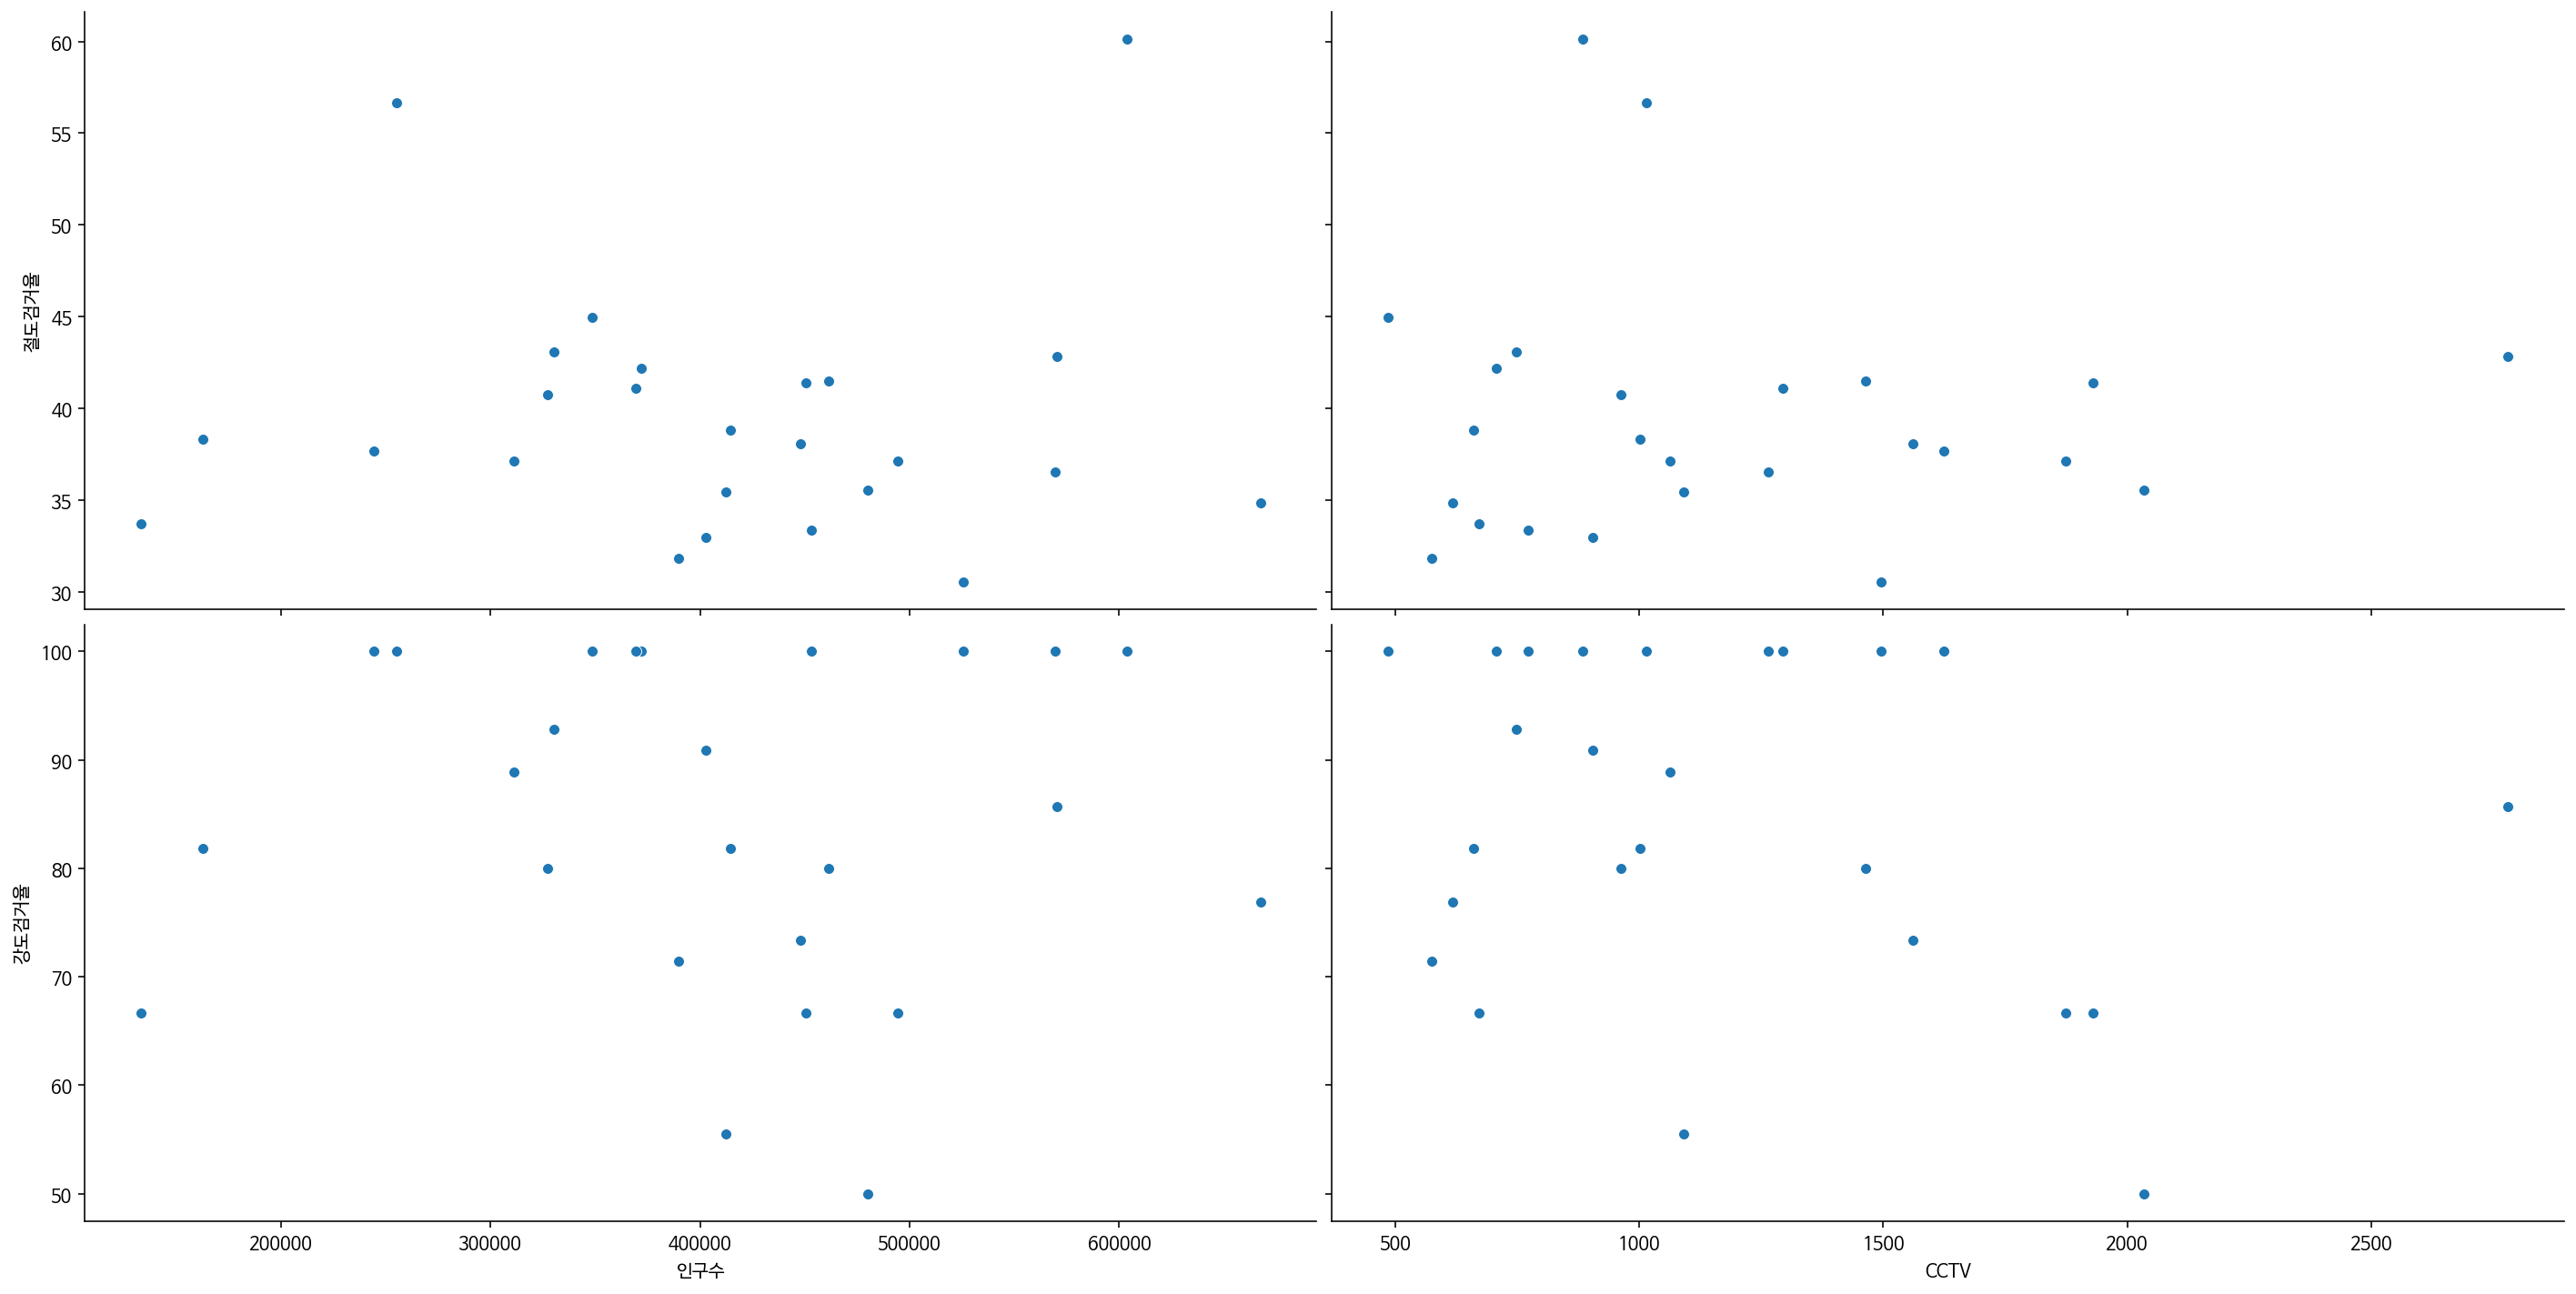

In [81]:
sns.pairplot(data=pivot_merge, x_vars=['인구수', 'CCTV'], y_vars=['절도검거율', '강도검거율'], height=5, aspect=2)

## 실습 16. 검거가 가장 높은 구는 어디입니까? 이를 확인하기 위해, 검거가 가장 높은 구부터 정렬하여 5개의 구까지 나타내세요.

In [84]:
pivot_merge.sort_values(by='검거', ascending=False).head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거,인구수,CCTV
구별,,,,,,,,,,,,,
도봉구,102.0,9.0,3.0,1063.0,1487.0,100.000000,100.0,100.0,44.967074,100.0,444.967074,348646.0,485
금천구,151.0,6.0,3.0,1567.0,2054.0,80.794702,100.0,100.0,56.668794,100.0,437.463496,255082.0,1015
광진구,240.0,14.0,4.0,3026.0,2625.0,91.666667,100.0,100.0,42.200925,100.0,433.867592,372164.0,707
강서구,262.0,13.0,7.0,2096.0,3207.0,72.900763,100.0,100.0,60.114504,100.0,433.015267,603772.0,884
용산구,194.0,14.0,5.0,1557.0,2050.0,89.175258,100.0,100.0,37.700706,100.0,426.875964,244203.0,1624


## 실습 17. 검거가 가장 큰값이 432.593167 입니다. 검거의 값이 최대가 100이 되도록 정규화를 하세요. 그리고 검거값으로 정렬하세요.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pivot_merge['검거'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
pivot_merge['검거']= scaler.fit_transform(X=pivot_merge['검거'].values.reshape(-1, 1)) * 100
pivot_merge

## .실습 18. sb.heatmap 을 이용해서 '강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율' 을 보여주세요. 단, '검거' 로 정렬한 데이터로 보여주세요.

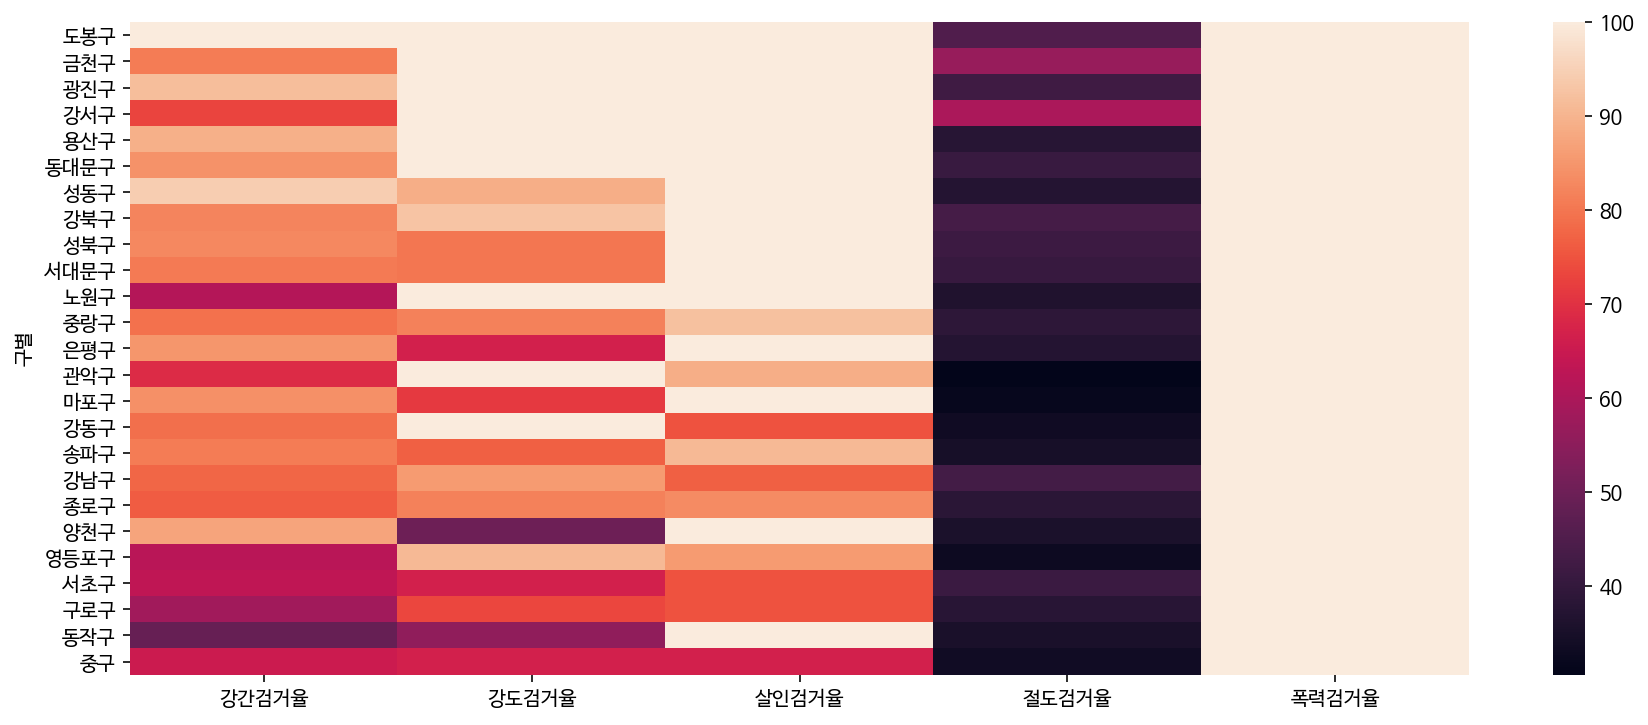

In [102]:
sns.heatmap(data= pivot_merge.sort_values(by='검거', ascending=False )[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']])

## 실습 19. 위에서 배운 히트맵을 이용해서, 살기 무서운 구가 어디인지 분석하세요. 

## 실습 20. crime_in_Seoul_final.csv 파일로, crime_anal_norm 를 저장하세요.

In [103]:
pivot_merge.to_csv('crime_in_Seoul_final.csv')